In [2]:
# load dicom file
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import pydicom.uid as uid



path = Path(
    "/Users/arstanbek/Library/CloudStorage/OneDrive-UGent/2 Organized exports/Zep3/MRI/"
)

files = list(path.glob("*.dcm"))
files = sorted([f.name for f in files])

# filename = "SER_40000_sl0300_ph0001.dcm"


def load_dicom(path, filename):
    dcm = pydicom.dcmread(path / filename, force=True)
    return dcm


dcm_array = []

for filename in files:
    dcm = load_dicom(path, filename)
    dcm.file_meta.TransferSyntaxUID = uid.ImplicitVRLittleEndian

    res = dcm.pixel_array
    dcm_array.append(res)

dcm_array = np.array(dcm_array)

print(dcm_array.shape)

(508, 512, 512)


(362, 242, 229)


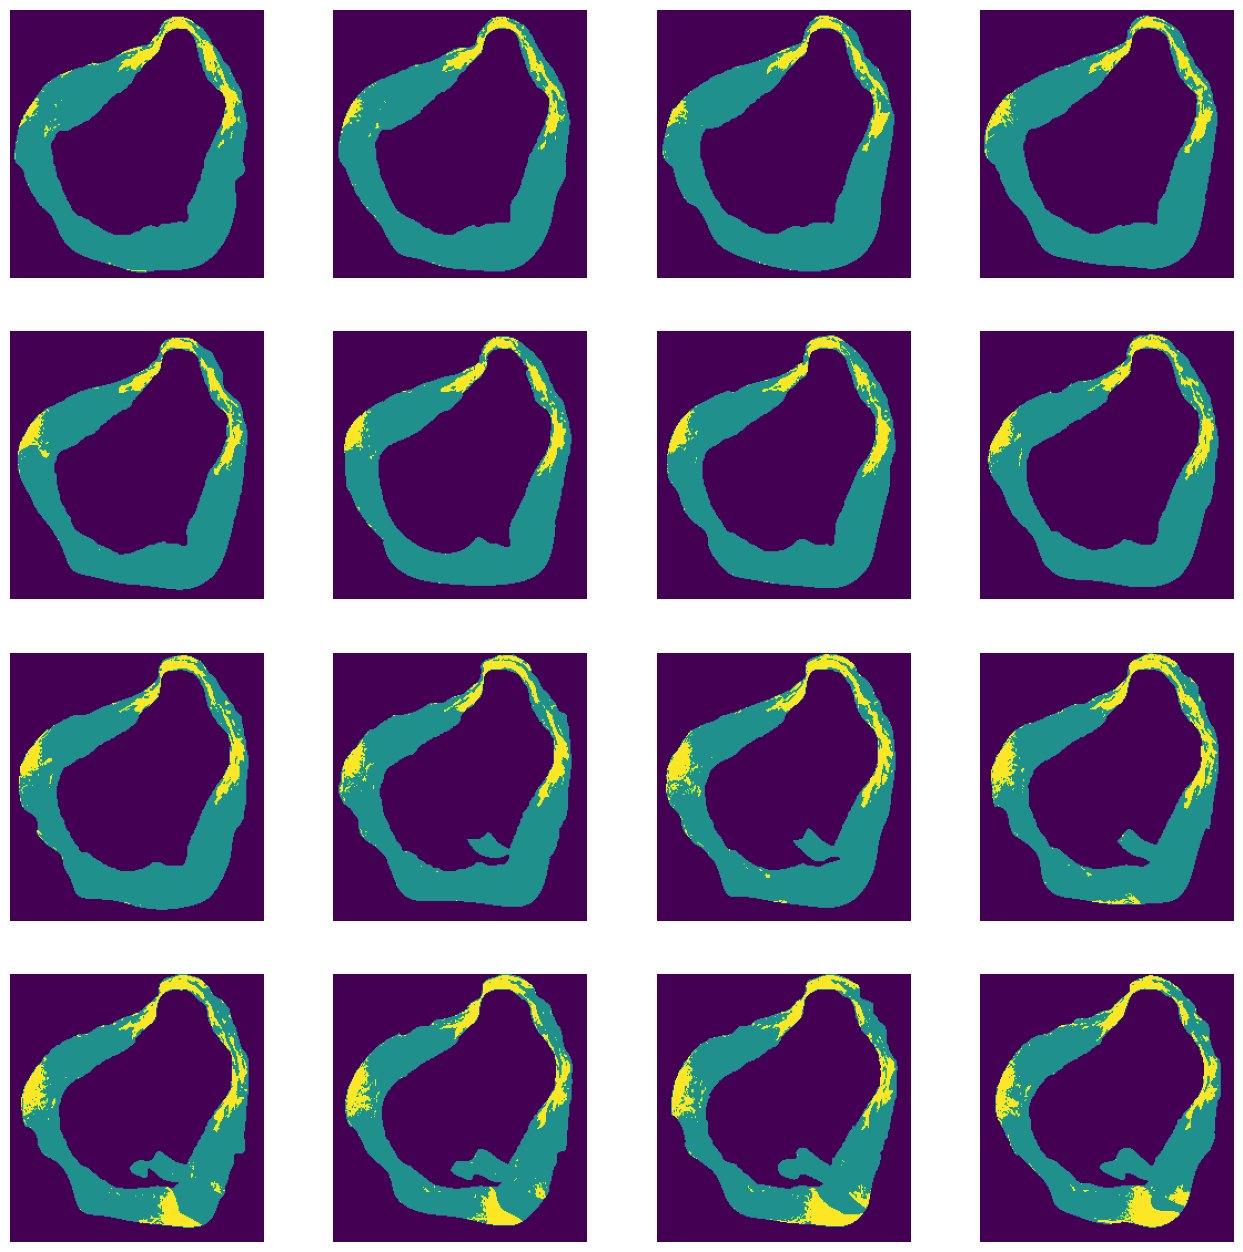

In [4]:
%matplotlib inline


res = dcm_array.copy()
# Remove zero slices from the bottom and top
res = res[:, np.any(res, axis=(0, 2)), :]

# Remove zero slices from the left and right
res = res[:, :, np.any(res, axis=(0, 1))]

# Remove zero slices from the front and back
res = res[np.any(res, axis=(1, 2)), :, :]

print(res.shape)


fig, axs  = plt.subplots(4, 4, figsize=(16, 16))

for i, axs in enumerate(axs.flat):
    axs.imshow(res[150 + 2 * i], cmap="viridis")
    axs.axis("off")

plt.show()

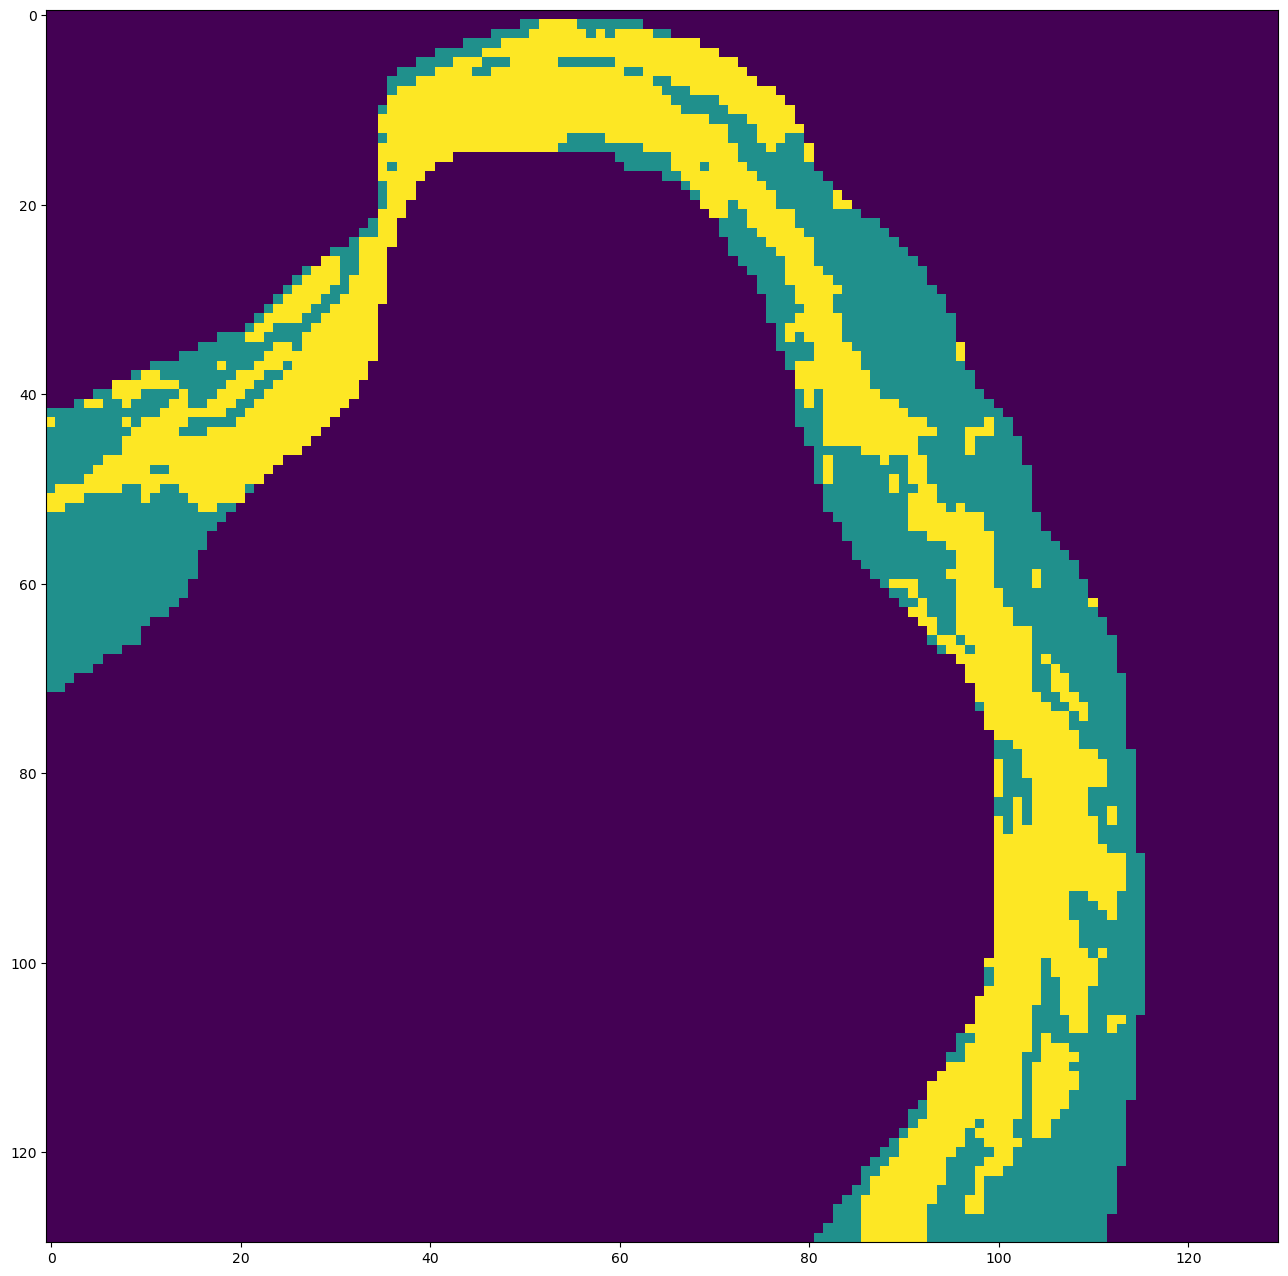

In [18]:
fig, axs  = plt.subplots(1, 1, figsize=(16, 16))

for i, axs in enumerate([axs]):
    axs.imshow(res[170, :130, -130:], cmap="viridis")

plt.show()

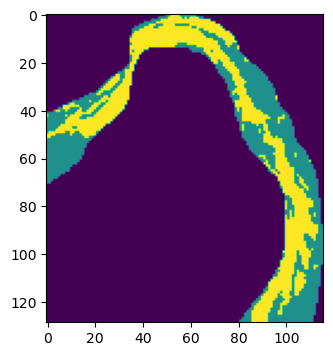

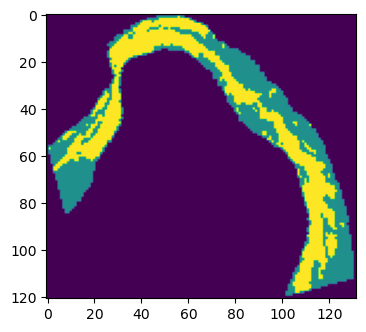

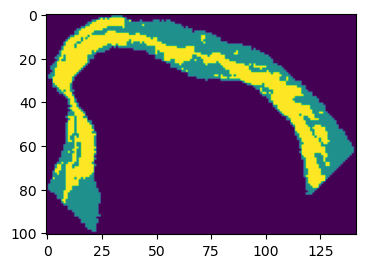

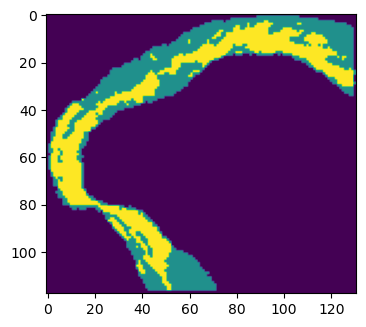

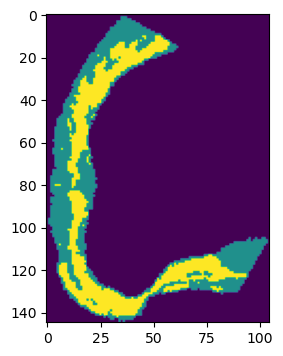

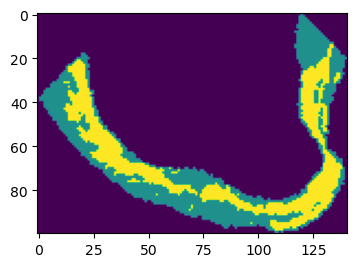

In [21]:
from skimage import transform


def rotate_and_crop(image, angle):
    rotated = transform.rotate(image, angle, resize=True, preserve_range=True)
    rotated = rotated[:, np.any(rotated, axis=0)]
    rotated = rotated[np.any(rotated, axis=1), :]
    rotated = (rotated > 0.5).astype(int) + (rotated > 1.5).astype(int)
    return rotated

im = res[170, :130, -130:]


for alpha in range(0, 90, 15):
    im = rotate_and_crop(im, alpha)
    plt.figure(figsize=(4, 4))
    plt.imshow(im)
    plt.show()

/opt/miniconda3/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


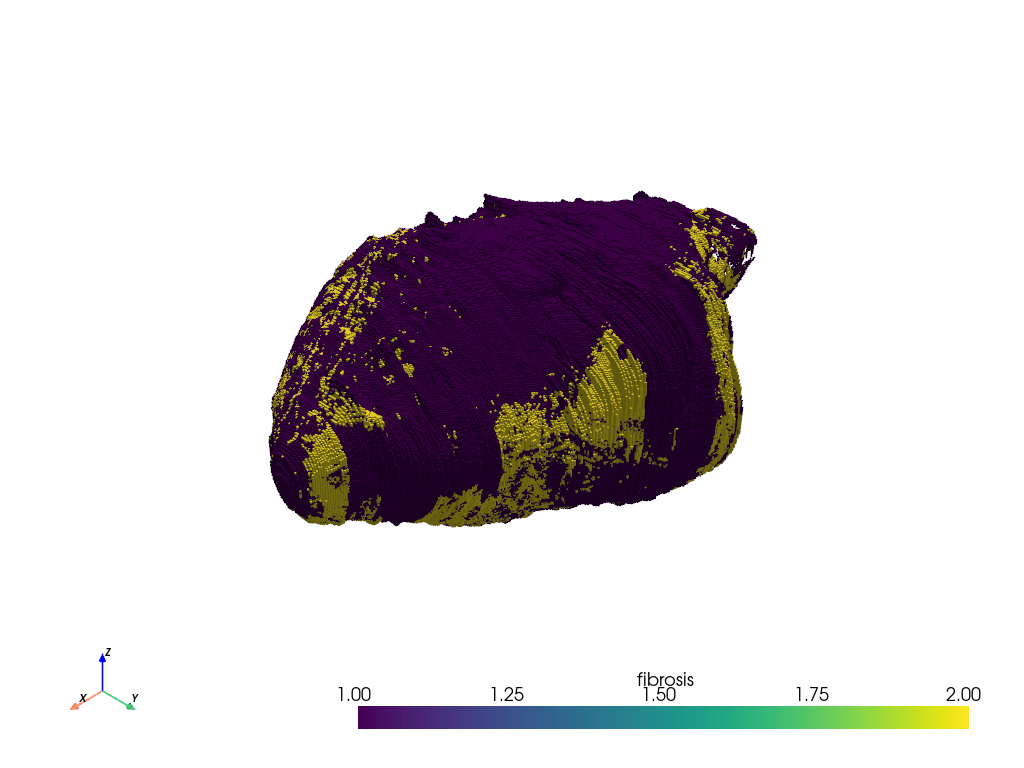

In [3]:
import finitewave as fw

# visualize the ventricle in 3D
mesh_builder = fw.VisMeshBuilder3D()
mesh_grid = mesh_builder.build_mesh(dcm_array)
mesh_grid = mesh_builder.add_scalar(dcm_array, 'fibrosis')
mesh_grid.plot()
# mesh_grid.save('ventricle_3d.vtu')